# Chapter 6 - Plotting with Seaborn and Customization

## Imports

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
fb = pd.read_csv(
    '../data/fb_stock_prices_2018.csv',
    index_col='date',
    parse_dates=True
)
quakes = pd.read_csv('../data/earthquakes.csv')

## Categorical data

<AxesSubplot: xlabel='magType', ylabel='mag'>

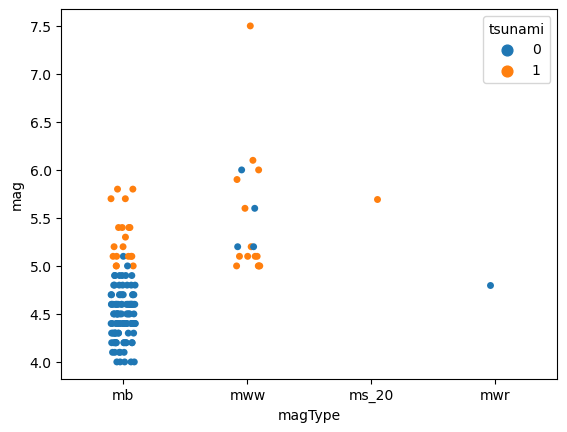

In [4]:
sns.stripplot(
    x='magType',
    y='mag',
    hue='tsunami',
    data=quakes.query('parsed_place == "Indonesia"')
)

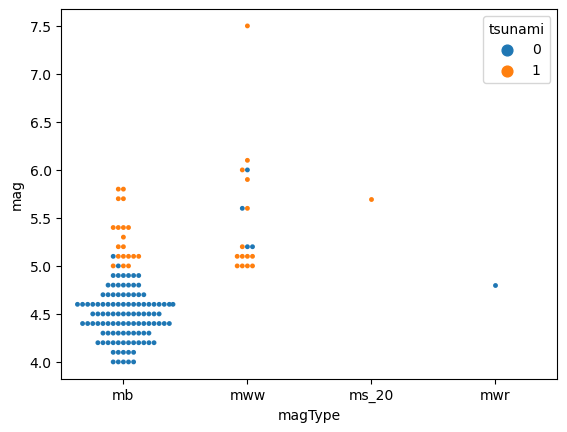

In [5]:
sns.swarmplot(
    x='magType',
    y='mag',
    hue='tsunami',
    data=quakes.query('parsed_place == "Indonesia"'),
    size=3.5
);

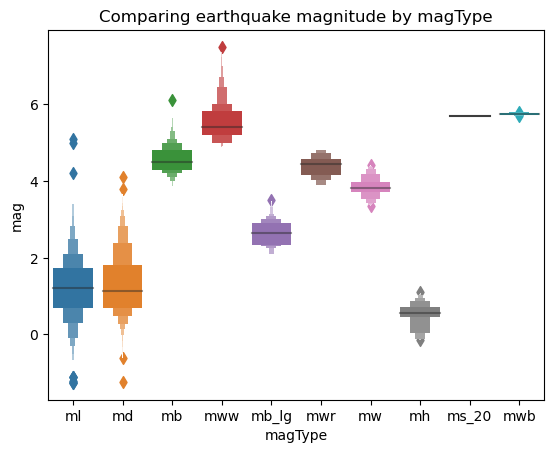

In [6]:
sns.boxenplot(
    x='magType',
    y='mag',
    data=quakes[['magType', 'mag']]
)
plt.title('Comparing earthquake magnitude by magType');

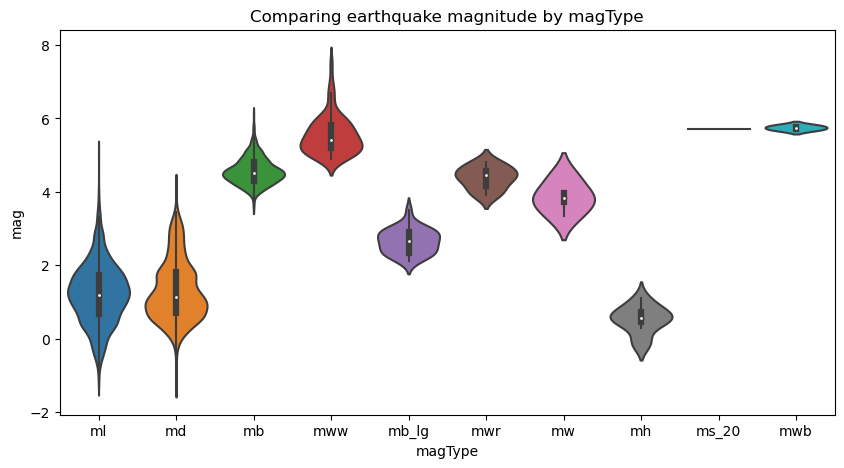

In [7]:
fig, axes = plt.subplots(figsize=(10,5))
sns.violinplot(
    x='magType', y='mag', data=quakes[['magType', 'mag']],
    ax=axes, scale='width'
)
plt.title('Comparing earthquake magnitude by magType');

### Correlations and heatmaps

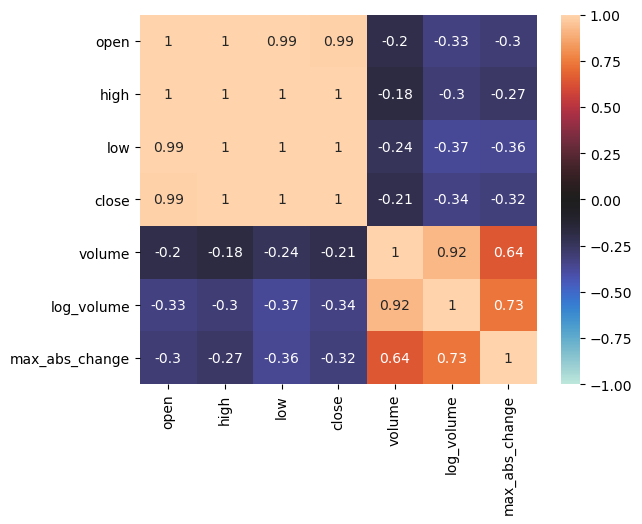

In [8]:
sns.heatmap(
    fb.sort_index().assign(
        log_volume=np.log(fb.volume),
        max_abs_change=fb.high - fb.low
    ).corr(),
    annot=True,
    center=0,
    vmin=-1,
    vmax=1
);

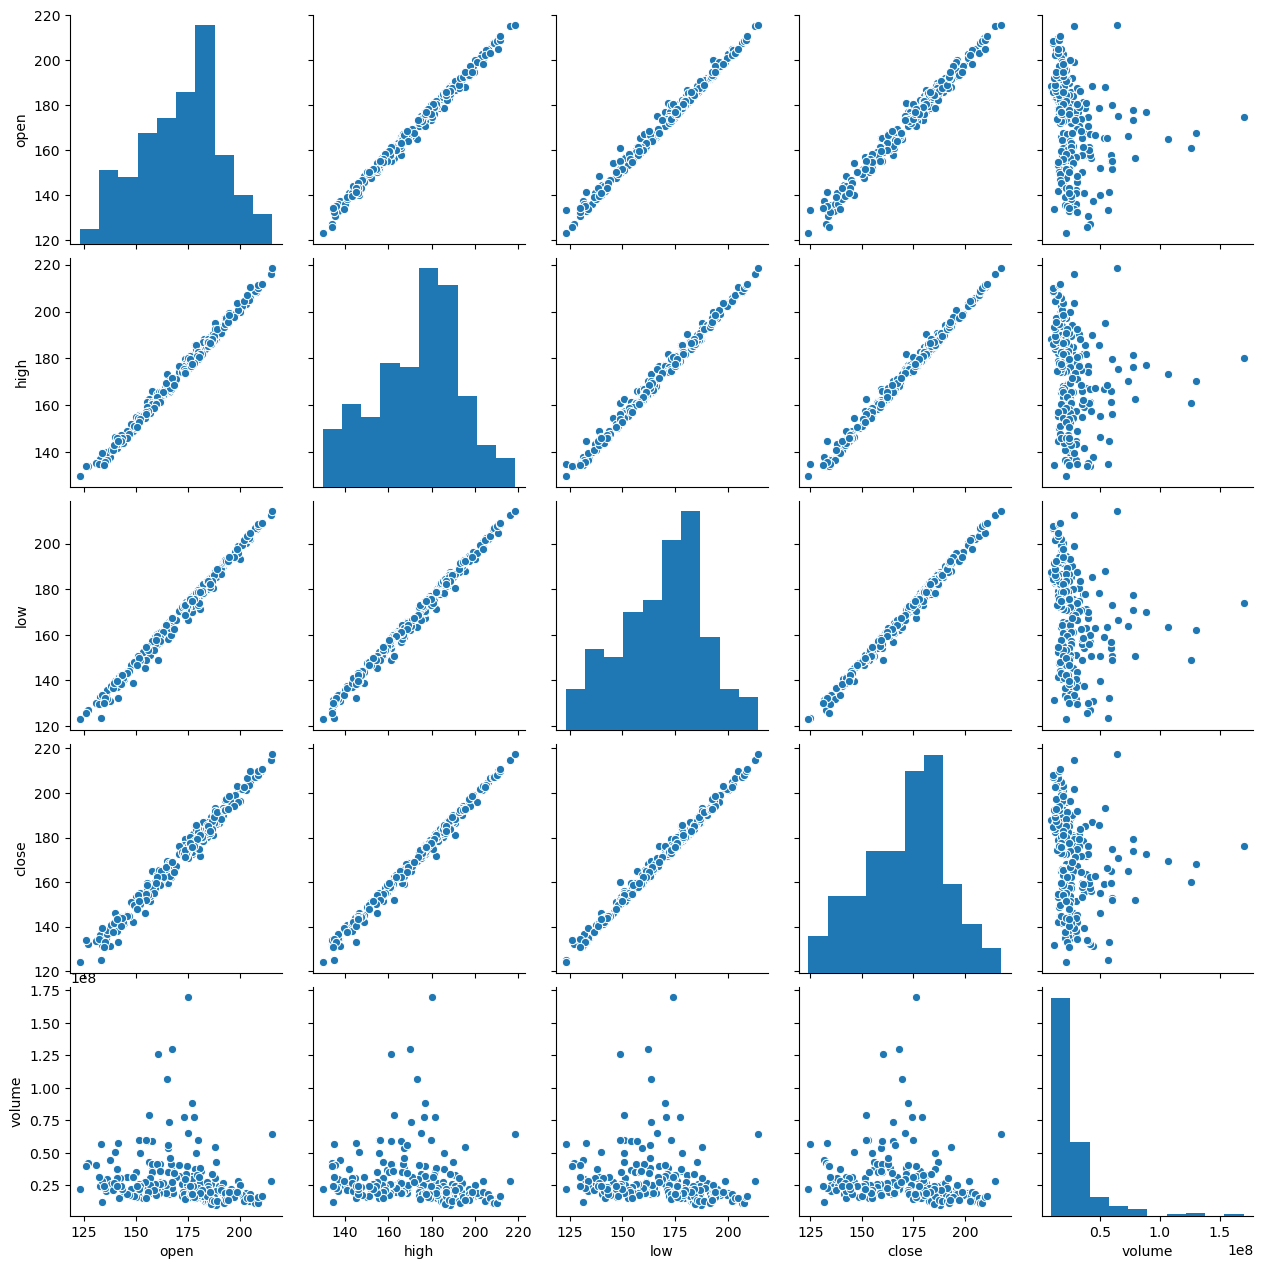

In [9]:
sns.pairplot(fb);

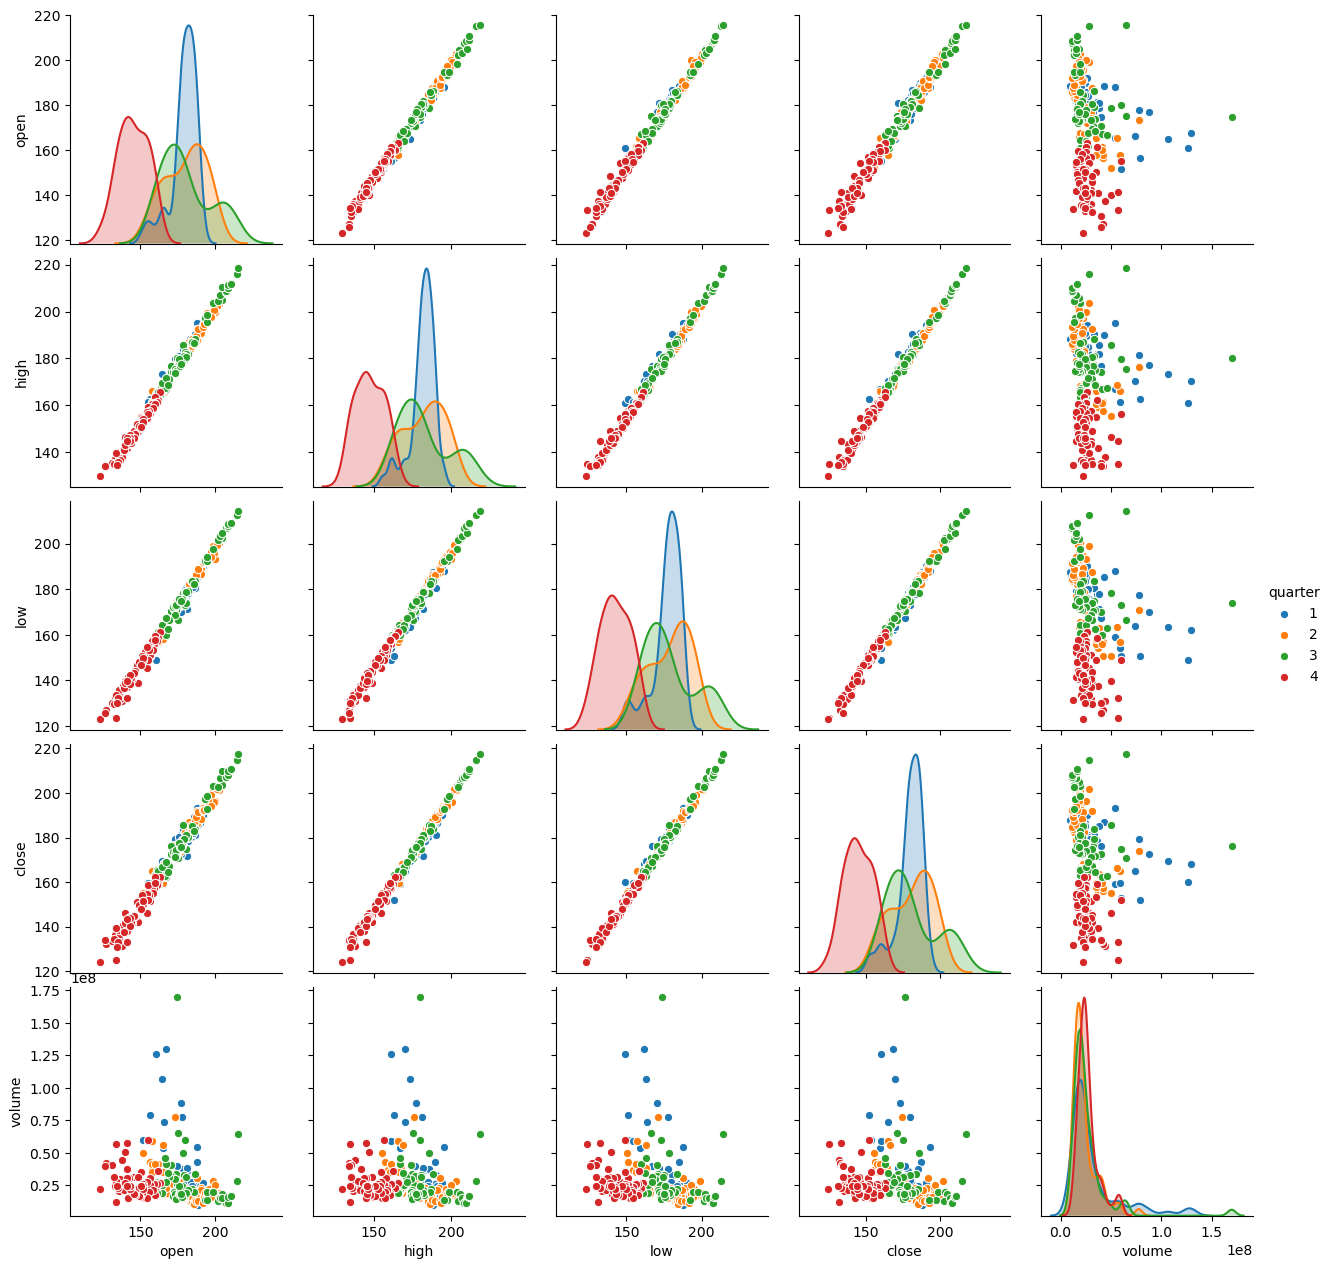

In [10]:
sns.pairplot(
    fb.assign(quarter=lambda df_: df_.index.quarter),
    diag_kind='kde', hue='quarter'
);

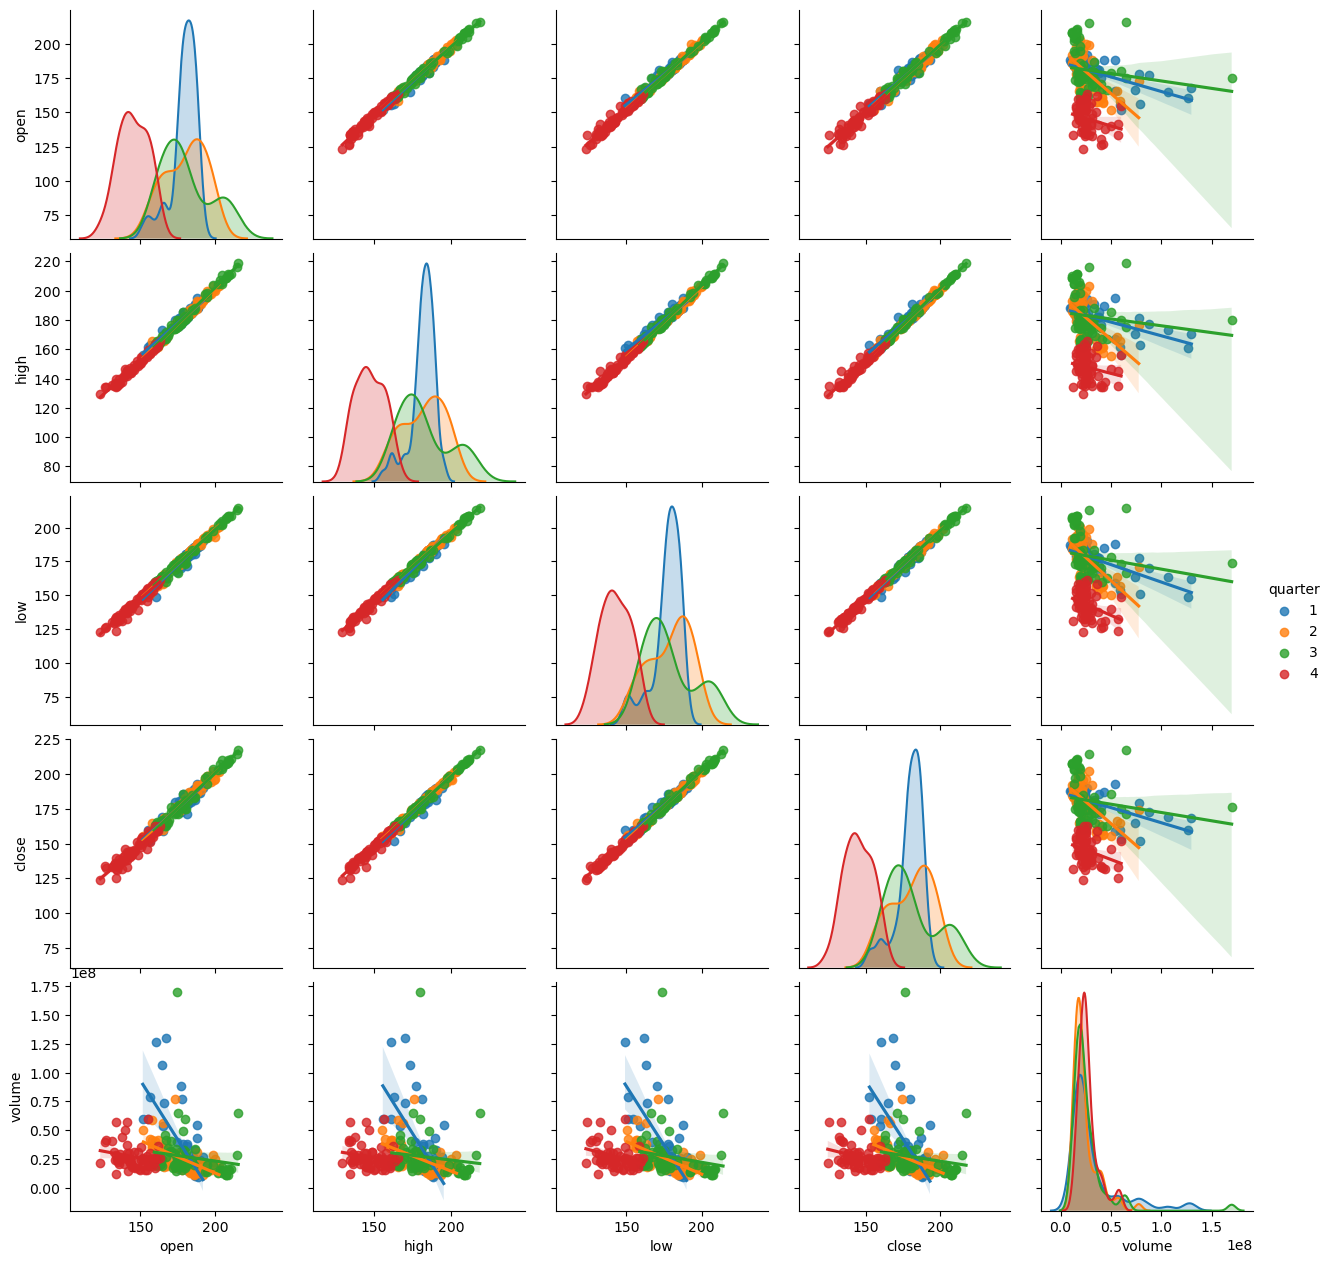

In [12]:
sns.pairplot(
    fb.assign(quarter=lambda df_: df_.index.quarter),
    kind='reg', hue='quarter'
);

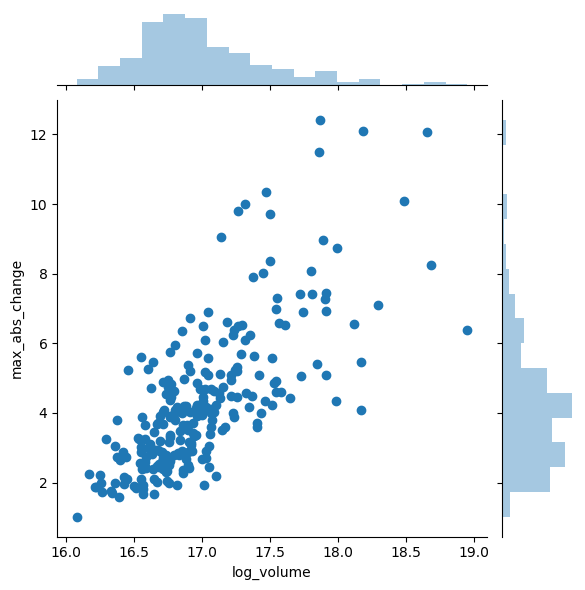

In [15]:
sns.jointplot(
    x='log_volume',
    y='max_abs_change',
    data=fb.assign(
        log_volume=np.log(fb.volume),
        max_abs_change=fb.high - fb.low
    )
);

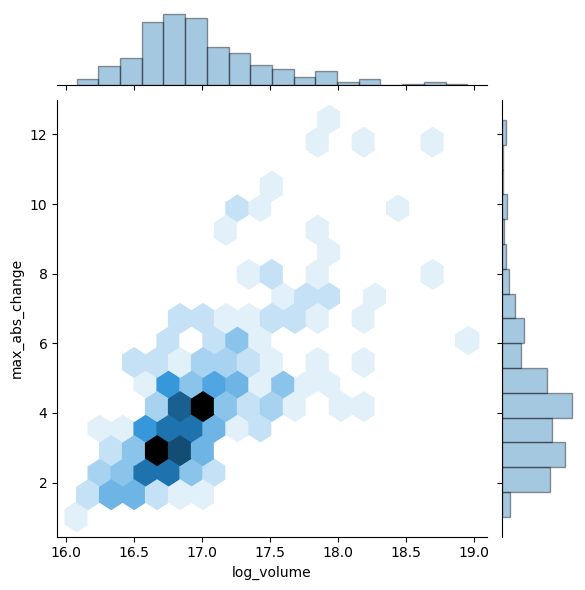

In [20]:
sns.jointplot(
    x='log_volume',
    y='max_abs_change',
    kind='hex',
    data=fb.assign(
        log_volume=np.log(fb.volume),
        max_abs_change=fb.high - fb.low
    ),
    marginal_kws={'hist_kws':{'ec':'k'}}
);

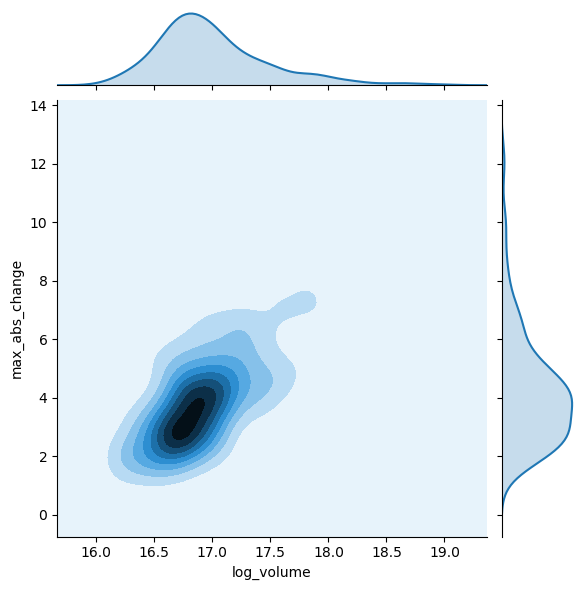

In [27]:
sns.jointplot(
    x='log_volume',
    y='max_abs_change',
    kind='kde',
    # joint_kws={'kde_kws':{'fill':None}},
    data=fb.assign(
        log_volume=np.log(fb.volume),
        max_abs_change=fb.high - fb.low
    )
);

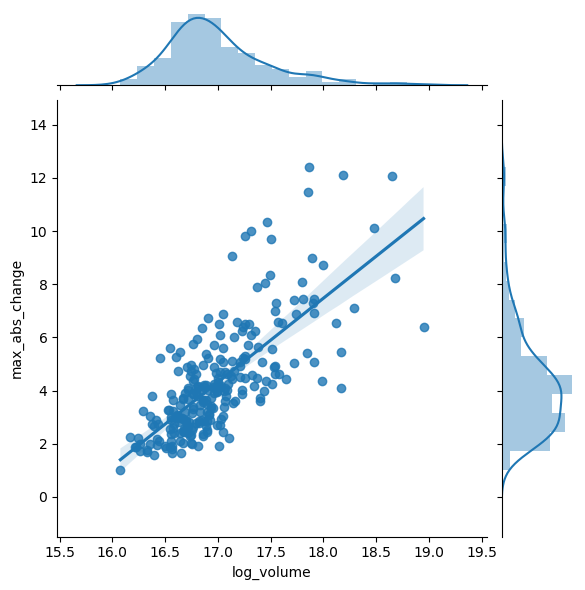

In [28]:
sns.jointplot(
    x='log_volume',
    y='max_abs_change',
    kind='reg',
    data=fb.assign(
        log_volume=np.log(fb.volume),
        max_abs_change=fb.high - fb.low
    )
);

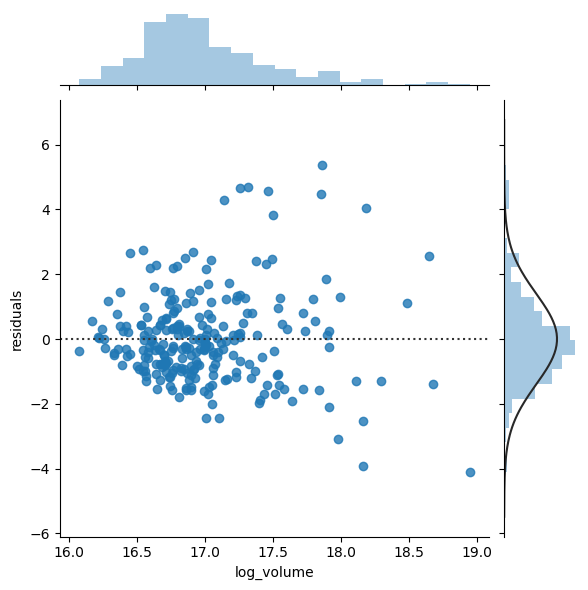

In [29]:
sns.jointplot(
    x='log_volume',
    y='max_abs_change',
    kind='resid',
    data=fb.assign(
        log_volume=np.log(fb.volume),
        max_abs_change=fb.high - fb.low
    )
)
plt.ylabel('residuals');

### Regression plots

In [31]:
fb_reg_data = fb.assign(
    log_volume=np.log(fb.volume),
    max_abs_change=fb.high - fb.low
).iloc[:, -2:]

In [32]:
import itertools

In [33]:
iterator = itertools.repeat("I'm an iterator", 1)
for i in iterator:
    print(f'-->{i}')

-->I'm an iterator


In [36]:
def reg_resid_plots(data):
    num_cols = data.shape[1]
    permutation_count = num_cols * (num_cols - 1)
    
    fig, ax = plt.subplots(permutation_count, 2, figsize=(15,8))
    
    for (x, y), axes, color in zip(
        itertools.permutations(data.columns, 2),
        ax,
        itertools.cycle(['royalblue', 'darkorange'])
    ):
        for subplot, func in zip(
            axes, (sns.regplot, sns.residplot)
        ):
            func(x=x, y=y, data=data, ax=subplot, color=color)
            if func == sns.residplot:
                subplot.set_ylabel('residuals')
    return fig.axes

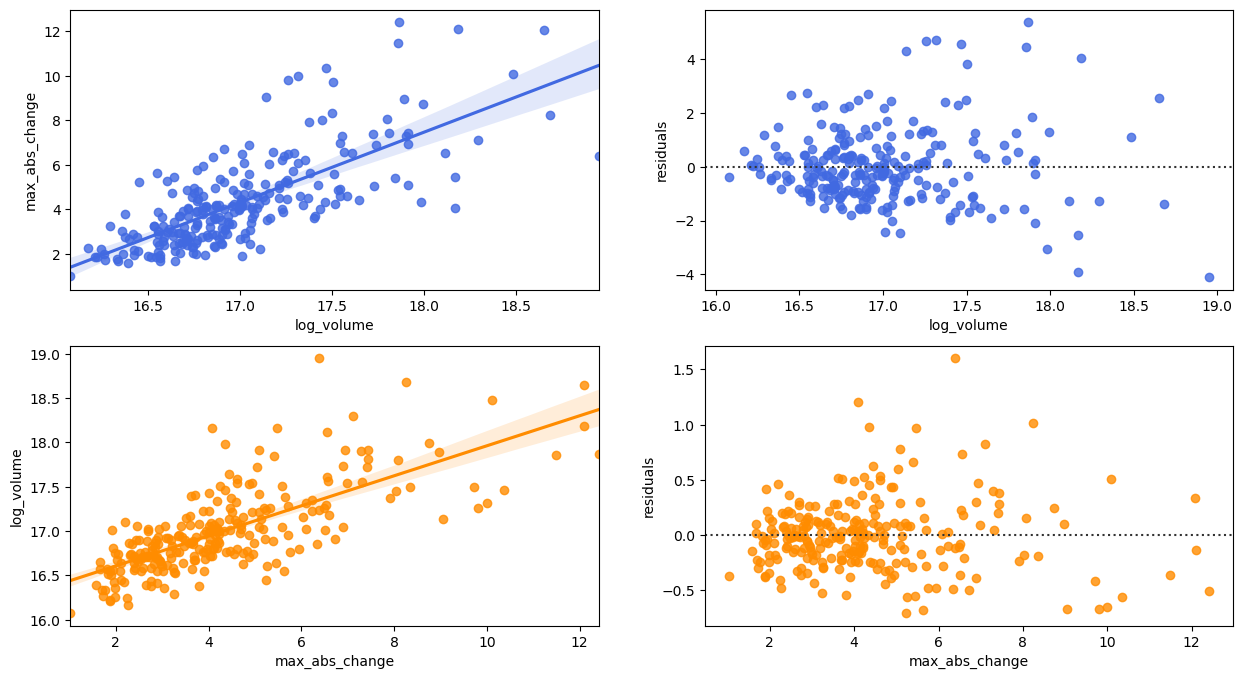

In [37]:
reg_resid_plots(fb_reg_data);

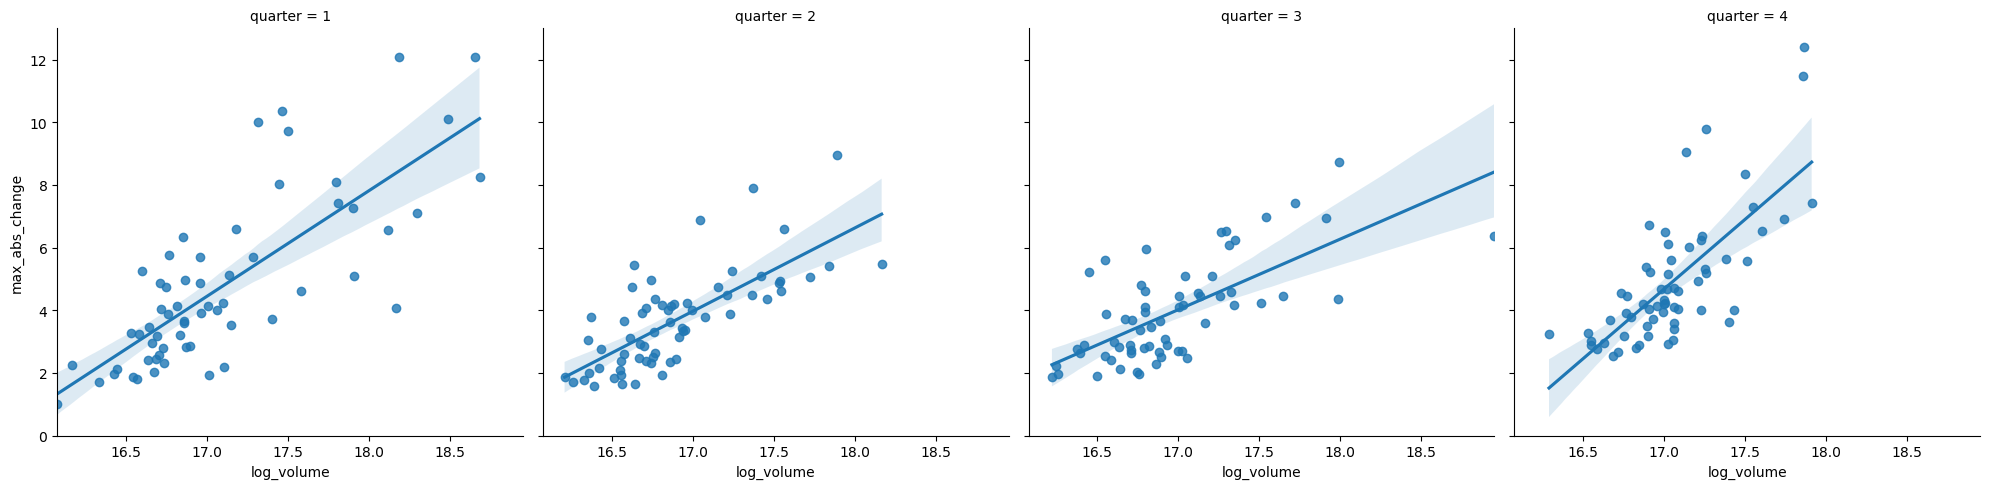

In [38]:
sns.lmplot(
    x='log_volume',
    y='max_abs_change',
    col='quarter',
    data=fb.assign(
        log_volume=np.log(fb.volume),
        max_abs_change=fb.high - fb.low,
        quarter=lambda df_: df_.index.quarter
    )
);

### Faceting

In [ ]:
# stopped here at page 351 of PDF